<a href="https://colab.research.google.com/github/benniella/Ml-learning/blob/main/optimisation%20technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##QUESTION 3


In [ ]:
#  Load the TikTok dataset
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

# Load CSV from file
df = pd.read_csv("tiktok_data.csv")
# Show the first 5 rows
df.head()


,Title,DateTime,Likes,Comments,Shares,Views,Engagement
0,Can AI think for it self?,2025-03-23 13:31:00,23,3,0,425,32
1,AI is not Spiritual,2025-03-16 14:20:00,20,4,1,364,34
2,New year video,2025-02-03 18:54:00,25,5,0,490,40
3,Just posting video,2024-10-30 18:00:00,15,0,0,343,15
4,Just posting,2024-10-21 10:38:00,41,4,0,493,53


In [ ]:
#  Sort posts by engagement score (Likes + 3*Comments + 2*Shares)
df["Engagement"] = df["Likes"] + 3 * df["Comments"] + 2 * df["Shares"]
df_sorted = df.sort_values(by="Engagement", ascending=False).reset_index(drop=True)

# Preview sorted results
df_sorted[["Title", "Likes", "Comments", "Shares", "Engagement"]]


,Title,Likes,Comments,Shares,Engagement
0,Dance,42,13,0,81
1,Just posting,47,3,0,56
2,Just posting,41,4,0,53
3,New year video,25,5,0,40
4,Just posting,33,1,0,36
5,AI is not Spiritual,20,4,1,34
6,Can AI think for it self?,23,3,0,32
7,pictures,27,1,1,32
8,Just posting,25,2,0,31
9,Just posting video,15,0,0,15


In [ ]:
#  Apply Greedy Algorithm (max 7 posts, max 2 per title)
selected_posts = []
title_count = defaultdict(int)

for _, row in df_sorted.iterrows():
    title = row["Title"]
    if len(selected_posts) < 7 and title_count[title] < 2:
        selected_posts.append(row)
        title_count[title] += 1

df_selected = pd.DataFrame(selected_posts).reset_index(drop=True)
# Final selected posts
df_selected = pd.DataFrame(selected_posts).reset_index(drop=True)
total_engagement = df_selected["Engagement"].sum()

# Show selected posts
df_selected[["Title", "Engagement"]]
#Show results
print("Best 7 Posts to Schedule This Week:")
print(df_selected[["Title", "DateTime", "Engagement"]])
print(f"\nTotal Engagement: {total_engagement}")


Best 7 Posts to Schedule This Week:
                       Title             DateTime  Engagement
0                      Dance  2024-09-15 15:31:00          81
1               Just posting  2024-09-25 14:16:00          56
2               Just posting  2024-10-21 10:38:00          53
3             New year video  2025-02-03 18:54:00          40
4        AI is not Spiritual  2025-03-16 14:20:00          34
5  Can AI think for it self?  2025-03-23 13:31:00          32
6                   pictures  2024-09-22 23:44:00          32

Total Engagement: 328


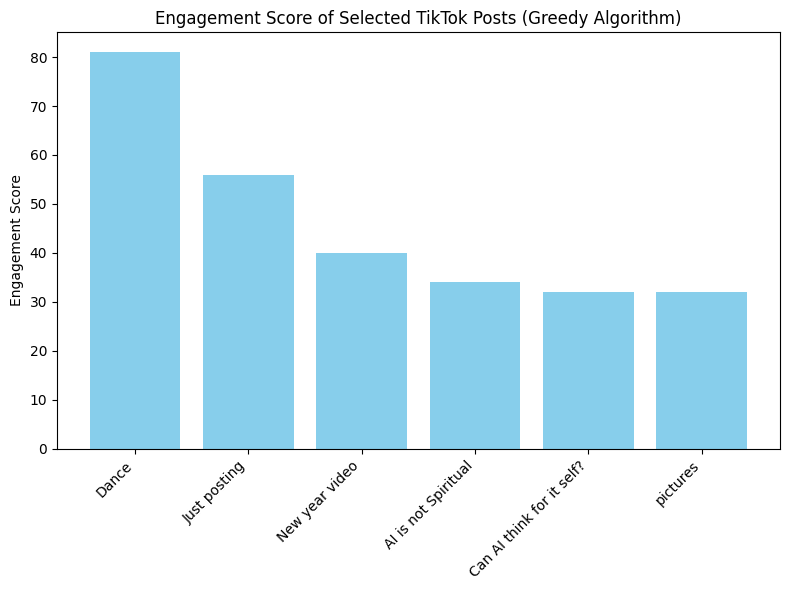

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(df_selected['Title'], df_selected['Engagement'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Engagement Score")
plt.title("Engagement Score of Selected TikTok Posts (Greedy Algorithm)")
plt.tight_layout()
plt.show()